In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('clean_tweet.csv')
df

,Unnamed: 0,text
0,0,ano difícil precisei ré organizar dinâmica vid...
1,1,hospitais bolsonaro visitou zero quantas famíl...
2,2,globo posicionava copa américa putinha anvisa ...
3,3,uau fato realmente faz sentido muuuuuuito sent...
4,4,aproximadamente milhões estudantes milhão prof...
...,...,...
2588,2588,preso brasileiro água minutos dia kit covid
2589,2589,galera quebrada anos preços alturas time murri...
2590,2590,gente cai papo globo quer eterna gente casa bo...
2591,2591,ser colocam ingresso barato r contar mínimo co...


In [20]:
df = df.rename(columns={'Unnamed: 0': 'tweet_index'})

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'].values.astype('U'))

Text(0, 0.5, 'WCSS')

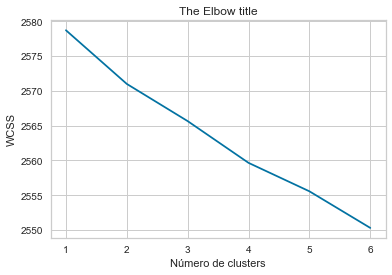

In [22]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'WCSS')

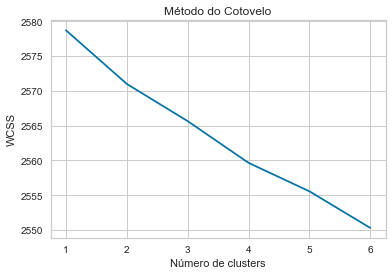

In [23]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [52]:
k = 4
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5,
                verbose=1);
label = km.fit(X)

Initialization complete
Iteration 0, inertia 5070.6217630177225
Iteration 1, inertia 2567.1713658021104
Iteration 2, inertia 2565.4275253709925
Iteration 3, inertia 2565.048896691535
Iteration 4, inertia 2564.923042624453
Iteration 5, inertia 2564.8645771679326
Iteration 6, inertia 2564.7857319880586
Iteration 7, inertia 2564.573621424241
Iteration 8, inertia 2564.2812790775465
Iteration 9, inertia 2564.1332107440594
Iteration 10, inertia 2564.0573562544528
Iteration 11, inertia 2563.97515131021
Iteration 12, inertia 2563.9149288121057
Iteration 13, inertia 2563.8160388486517
Iteration 14, inertia 2563.5893853231423
Iteration 15, inertia 2563.307424911366
Iteration 16, inertia 2563.1636468330216
Iteration 17, inertia 2563.1311801070915
Iteration 18, inertia 2563.122372466324
Iteration 19, inertia 2563.114081776591
Iteration 20, inertia 2563.1095697134037
Iteration 21, inertia 2563.1050288330666
Iteration 22, inertia 2563.095242041382
Iteration 23, inertia 2563.0786023991996
Iteration 2

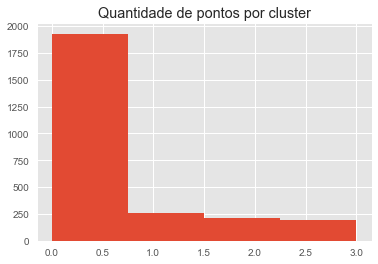

In [53]:
plt.hist(km.labels_, bins=k)
plt.title("Quantidade de pontos por cluster")
plt.show()

In [26]:
from sklearn.decomposition import PCA

clusters = km.predict(X)

pca = PCA(n_components=2)
two_dim = pca.fit_transform(X.todense())

scatter_x = two_dim[:, 0]
scatter_y = two_dim[:, 1]

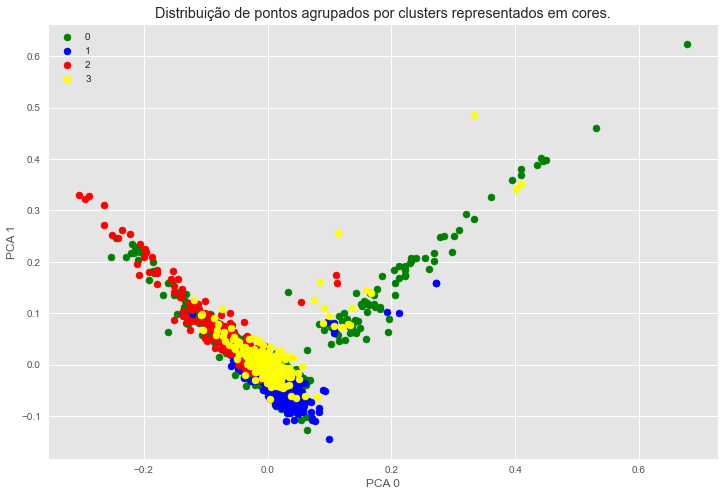

In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(12,8)

cmap = {0: 'green', 1: 'blue', 2: 'red', 3: 'yellow'}

for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.title('Distribuição de pontos agrupados por clusters representados em cores.')
plt.show()

In [54]:
print("Palavras mais utilizadas por cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Palavras mais utilizadas por cluster:
Cluster 0:
 brasil
 durante
 gente
 covid
 ser
 meio
 bolsonaro
 ano
 dia
 desde
Cluster 1:
 pessoas
 quase
 cara
 mil
 máscara
 anos
 covid
 gente
 fez
 vida
Cluster 2:
 acabou
 governo
 federal
 bolsonaro
 covid
 saúde
 vacina
 durante
 bem
 brasil
Cluster 3:
 cpi
 hang
 crimes
 luciano
 bolsonaro
 juristas
 prevent
 covid
 nota
 depoimento


In [38]:
from sklearn.cluster import AgglomerativeClustering

k = 4
ag = AgglomerativeClustering(n_clusters=k)
ag.fit(X.toarray());

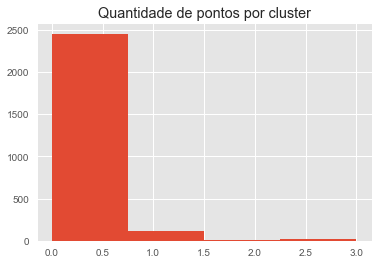

In [46]:
plt.hist(ag.labels_, bins=k)
plt.title("Quantidade de pontos por cluster")
plt.show()

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    
    dendrogram(linkage_matrix, **kwargs)

In [32]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X.toarray())

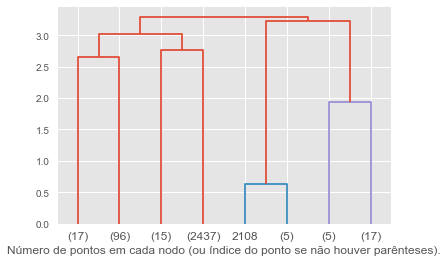

In [43]:
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Número de pontos em cada nodo (ou índice do ponto se não houver parênteses).")
plt.show()

In [34]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [35]:
bandwidth = estimate_bandwidth(X.toarray())
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(X.toarray())
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


IndexError: index 2 is out of bounds for axis 0 with size 2

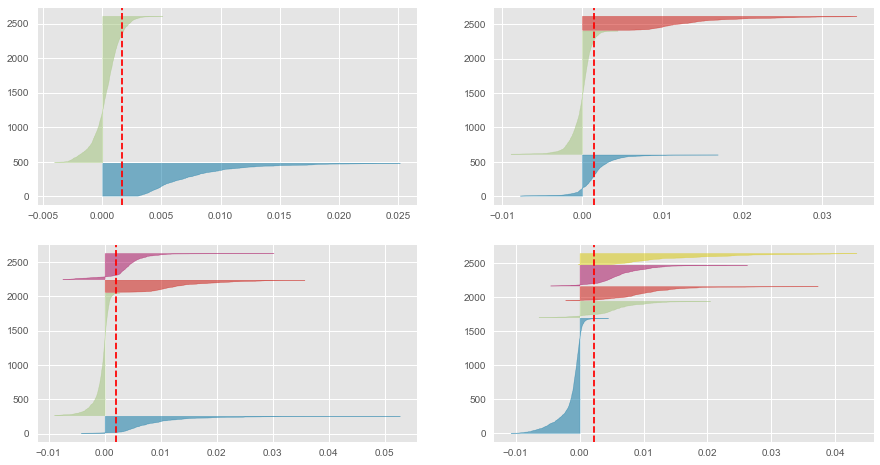

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)